# Simulación de la conductividad de los semiconductores extrínsecos e intrínsecos 

Autores:
- Santiago Vélez Arboleda
- César Augusto Montoya Ocampo

In [1]:
try:
    import google.colab
    print("Running in Google Colab")
    !git clone https://github.com/cesara-montoya1/semiconductor_simulation
    !mv semiconductor_simulation/* .
    !rm -rf semiconductor_simulation
    !pip install pint
except ImportError:
    print("Not running in Google Colab")

Not running in Google Colab


## Librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from semiconductor import Semiconductor
from constants import u, Q_E

In [3]:
# Parámetros
temperatura = 300 * u.kelvin
dopajes = np.logspace(13, 18, num=200) * u.cm**-3

# Inicializar listas para almacenar resultados
E_fermi_n = []
E_fermi_p = []

# Para referencia intrínseca
semi_intrinseco = Semiconductor("Si", T=temperatura)
Ef_intrinseco = semi_intrinseco.fermi_level().to("eV").magnitude
Eg = semi_intrinseco.band_gap().to("eV").magnitude
Ev = 0.0  # Se toma como referencia
Ec = Eg   # Ev + Eg

for Nd in dopajes:
    semi_n = Semiconductor("Si", T=temperatura, N_D=Nd, N_A=0 * u.meter**-3)
    E_fermi_n.append(semi_n.fermi_level().to("eV").magnitude)

for Na in dopajes:
    semi_p = Semiconductor("Si", T=temperatura, N_D=0 * u.meter**-3, N_A=Na)
    E_fermi_p.append(semi_p.fermi_level().to("eV").magnitude)


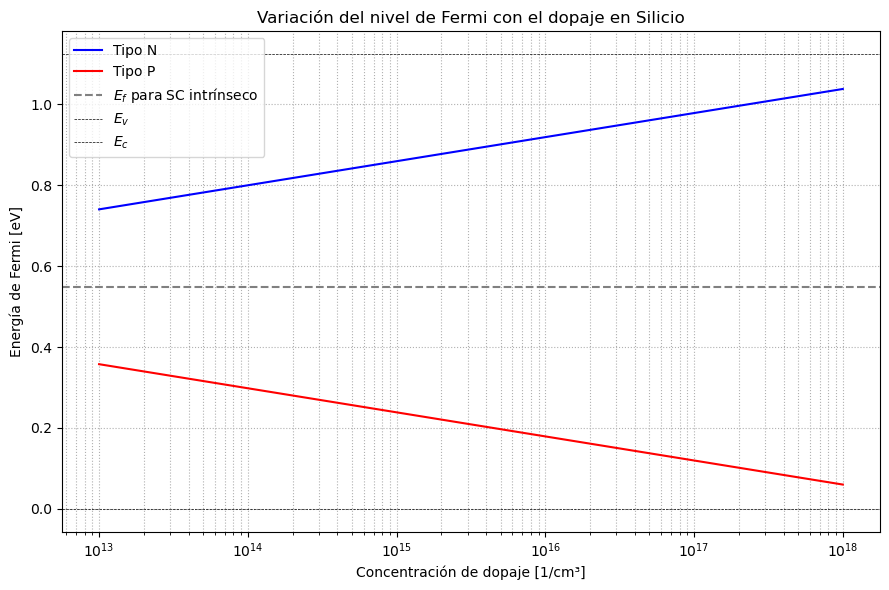

In [4]:
# Gráfica
fig, ax = plt.subplots(figsize=(9, 6))

ax.semilogx(dopajes.to("1/cm**3").magnitude, E_fermi_n, label="Tipo N", color="blue")
ax.semilogx(dopajes.to("1/cm**3").magnitude, E_fermi_p, label="Tipo P", color="red")
ax.axhline(Ef_intrinseco, linestyle="--", color="gray", label=r"$E_f$ para SC intrínseco")
ax.axhline(Ev, linestyle="--", color="black", linewidth=0.5, label=r"$E_v$")
ax.axhline(Ec, linestyle="--", color="black", linewidth=0.5, label=r"$E_c$")

ax.set_xlabel("Concentración de dopaje [1/cm³]")
ax.set_ylabel("Energía de Fermi [eV]")
ax.set_title("Variación del nivel de Fermi con el dopaje en Silicio")
ax.legend()
ax.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()

In [13]:
# Parámetros
temperaturas = np.linspace(100, 1000, 50) * u.kelvin
dopaje = 1e13 * u.cm**-3  # Fijo para todos los casos

conductividades_n = []
conductividades_p = []
conductividades_sp = []
conductividades_intrinseco = []

# Calcular a 300K para valor de referencia
semi_ref = Semiconductor("Si", T=300 * u.kelvin)
n_i_ref, p_i_ref = semi_ref.carrier_concentrations()
mu_i_ref, mu_i_ref = semi_ref.matthiesen_rule()
sigma_intrinseco_ref = (n_i_ref * Q_E * mu_i_ref + p_i_ref * Q_E * mu_i_ref).to("S/cm").magnitude
print(f"Conductividad intrínseca a 300K: {sigma_intrinseco_ref:.2e} S/cm")

for T in temperaturas:
    # Intrínseco
    semi_intrinseco = Semiconductor("Si", T=T)
    n_i, p_i = semi_intrinseco.carrier_concentrations()
    mu_i, mu_i = semi_intrinseco.matthiesen_rule()
    sigma_intrinseco = (n_i * Q_E * mu_i + p_i * Q_E * mu_i).to("S/cm")
    conductividades_intrinseco.append(sigma_intrinseco.magnitude)
    # Solo donadores (tipo N)
    semi_n = Semiconductor("Si", T=T, N_D=dopaje, N_A=0 * u.meter**-3)
    n_n, p_n = semi_n.carrier_concentrations()
    mu_n, mu_p = semi_n.matthiesen_rule()
    sigma_n = (n_n * Q_E * mu_n + p_n * Q_E * mu_p).to("S/cm")
    conductividades_n.append(sigma_n.magnitude)

    # Solo aceptores (tipo P)
    semi_p = Semiconductor("Si", T=T, N_D=0 * u.meter**-3, N_A=dopaje)
    n_p, p_p = semi_p.carrier_concentrations()
    mu_n, mu_p = semi_p.matthiesen_rule()
    sigma_p = (n_p * Q_E * mu_n + p_p * Q_E * mu_p).to("S/cm")
    conductividades_p.append(sigma_p.magnitude)

    # Ambos dopajes pero inclinado hacia P
    semi_semi_p = Semiconductor("Si", T=T, N_D=0.25*dopaje, N_A=0.75*dopaje)
    n_sp, p_sp = semi_semi_p.carrier_concentrations()
    mu_sp, mu_sp = semi_semi_p.matthiesen_rule()
    sigma_sp = (n_sp * Q_E * mu_sp + p_sp * Q_E * mu_sp).to("S/cm")
    conductividades_sp.append(sigma_sp.magnitude)

Conductividad intrínseca a 300K: 5.44e-07 S/cm


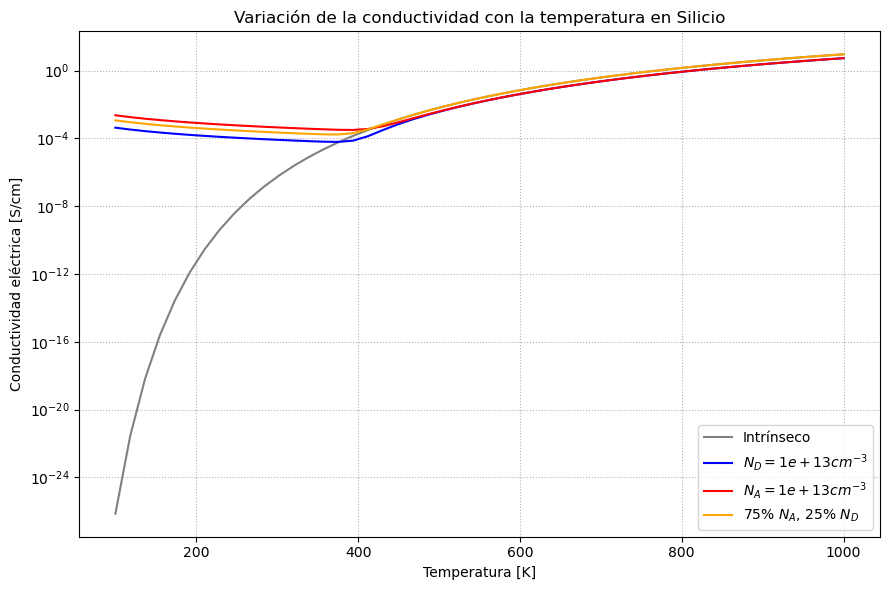

In [6]:
# Gráfica
fig, ax = plt.subplots(figsize=(9, 6))

ax.semilogy(temperaturas.magnitude, conductividades_intrinseco, label="Intrínseco", color="gray")
ax.semilogy(temperaturas.magnitude, conductividades_n, label=fr"$N_D = {dopaje.magnitude:.0e} cm^{{-3}}$", color="blue")
ax.semilogy(temperaturas.magnitude, conductividades_p, label=fr"$N_A = {dopaje.magnitude:.0e} cm^{{-3}}$", color="red")
ax.semilogy(temperaturas.magnitude, conductividades_sp, label=r"75% $N_A$, 25% $N_D$", color="orange")

ax.set_xlabel("Temperatura [K]")
ax.set_ylabel("Conductividad eléctrica [S/cm]")
ax.set_title("Variación de la conductividad con la temperatura en Silicio")
ax.grid(True, linestyle=":")
ax.legend()
plt.tight_layout()
plt.show()

In [14]:
# Parámetros
temperaturas = np.linspace(100, 1000, 50) * u.kelvin
dopaje = 1e13 * u.cm**-3  # Fijo para todos los casos

conductividades_n = []
conductividades_p = []
conductividades_sn = []
conductividades_intrinseco = []

# Calcular a 300K para valor de referencia
semi_ref = Semiconductor("Ge", T=300 * u.kelvin)
n_i_ref, p_i_ref = semi_ref.carrier_concentrations()
mu_i_ref, mu_i_ref = semi_ref.matthiesen_rule()
sigma_intrinseco_ref = (n_i_ref * Q_E * mu_i_ref + p_i_ref * Q_E * mu_i_ref).to("S/cm").magnitude
print(f"Conductividad intrínseca a 300K: {sigma_intrinseco_ref:.2e} S/cm")

for T in temperaturas:
    # Intrínseco
    semi_intrinseco = Semiconductor("Ge", T=T)
    n_i, p_i = semi_intrinseco.carrier_concentrations()
    mu_i, mu_i = semi_intrinseco.matthiesen_rule()
    sigma_intrinseco = (n_i * Q_E * mu_i + p_i * Q_E * mu_i).to("S/cm")
    conductividades_intrinseco.append(sigma_intrinseco.magnitude)
    # Solo donadores (tipo N)
    semi_n = Semiconductor("Ge", T=T, N_D=dopaje, N_A=0 * u.meter**-3)
    n_n, p_n = semi_n.carrier_concentrations()
    mu_n, mu_p = semi_n.matthiesen_rule()
    sigma_n = (n_n * Q_E * mu_n + p_n * Q_E * mu_p).to("S/cm")
    conductividades_n.append(sigma_n.magnitude)

    # Solo aceptores (tipo P)
    semi_p = Semiconductor("Ge", T=T, N_D=0 * u.meter**-3, N_A=dopaje)
    n_p, p_p = semi_p.carrier_concentrations()
    mu_n, mu_p = semi_p.matthiesen_rule()
    sigma_p = (n_p * Q_E * mu_n + p_p * Q_E * mu_p).to("S/cm")
    conductividades_p.append(sigma_p.magnitude)

    # Ambos dopajes pero inclinado hacia N
    semi_semi_n = Semiconductor("Ge", T=T, N_D=0.75*dopaje, N_A=0.25*dopaje)
    n_sn, p_sn = semi_semi_n.carrier_concentrations()
    mu_sn, mu_sn = semi_semi_n.matthiesen_rule()
    sigma_sn = (n_sn * Q_E * mu_sn + p_sn * Q_E * mu_sn).to("S/cm")
    conductividades_sn.append(sigma_sn.magnitude)


Conductividad intrínseca a 300K: 2.11e-03 S/cm


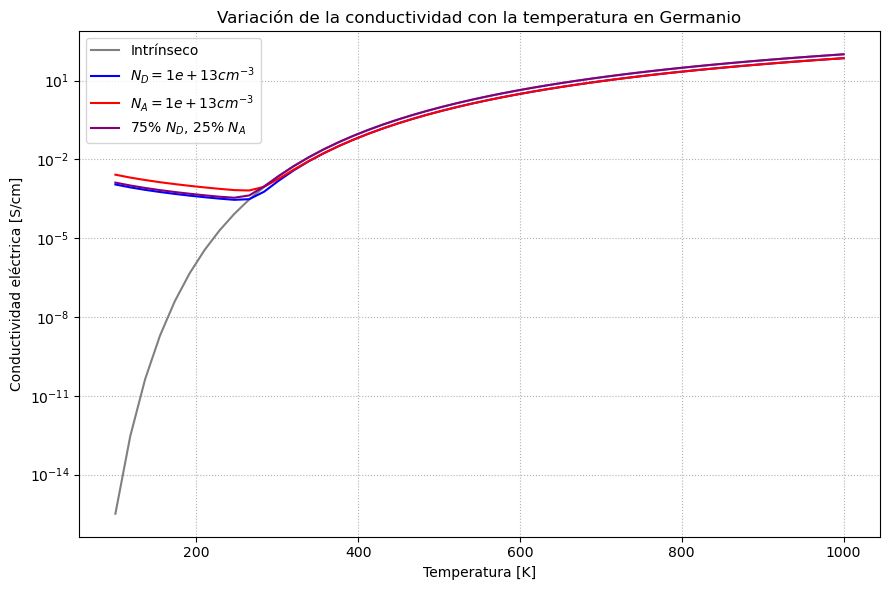

In [8]:
# Gráfica
fig, ax = plt.subplots(figsize=(9, 6))

ax.semilogy(temperaturas.magnitude, conductividades_intrinseco, label="Intrínseco", color="gray")
ax.semilogy(temperaturas.magnitude, conductividades_n, label=fr"$N_D = {dopaje.magnitude:.0e} cm^{{-3}}$", color="blue")
ax.semilogy(temperaturas.magnitude, conductividades_p, label=fr"$N_A = {dopaje.magnitude:.0e} cm^{{-3}}$", color="red")
ax.semilogy(temperaturas.magnitude, conductividades_sn, label=fr"75% $N_D$, 25% $N_A$", color="purple")

ax.set_xlabel("Temperatura [K]")
ax.set_ylabel("Conductividad eléctrica [S/cm]")
ax.set_title("Variación de la conductividad con la temperatura en Germanio")
ax.grid(True, linestyle=":")
ax.legend()
plt.tight_layout()
plt.show()

In [15]:
# Parámetros
temperaturas = np.linspace(100, 1000, 50) * u.kelvin
dopaje = 1e13 * u.cm**-3  # Fijo para todos los casos

conductividades_n = []
conductividades_p = []
conductividades_sn = []
conductividades_intrinseco = []

# Calcular a 300K para valor de referencia
semi_ref = Semiconductor("GaAs", T=300 * u.kelvin)
n_i_ref, p_i_ref = semi_ref.carrier_concentrations()
mu_i_ref, mu_i_ref = semi_ref.matthiesen_rule()
sigma_intrinseco_ref = (n_i_ref * Q_E * mu_i_ref + p_i_ref * Q_E * mu_i_ref).to("S/cm").magnitude
print(f"Conductividad intrínseca a 300K: {sigma_intrinseco_ref:.2e} S/cm")

for T in temperaturas:
    # Intrínseco
    semi_intrinseco = Semiconductor("GaAs", T=T)
    n_i, p_i = semi_intrinseco.carrier_concentrations()
    mu_i, mu_i = semi_intrinseco.matthiesen_rule()
    sigma_intrinseco = (n_i * Q_E * mu_i + p_i * Q_E * mu_i).to("S/cm")
    conductividades_intrinseco.append(sigma_intrinseco.magnitude)
    # Solo donadores (tipo N)
    semi_n = Semiconductor("GaAs", T=T, N_D=dopaje, N_A=0 * u.meter**-3)
    n_n, p_n = semi_n.carrier_concentrations()
    mu_n, mu_p = semi_n.matthiesen_rule()
    sigma_n = (n_n * Q_E * mu_n + p_n * Q_E * mu_p).to("S/cm")
    conductividades_n.append(sigma_n.magnitude)

    # Solo aceptores (tipo P)
    semi_p = Semiconductor("GaAs", T=T, N_D=0 * u.meter**-3, N_A=dopaje)
    n_p, p_p = semi_p.carrier_concentrations()
    mu_n, mu_p = semi_p.matthiesen_rule()
    sigma_p = (n_p * Q_E * mu_n + p_p * Q_E * mu_p).to("S/cm")
    conductividades_p.append(sigma_p.magnitude)

    # Ambos dopajes pero inclinado hacia N
    semi_semi_n = Semiconductor("GaAs", T=T, N_D=0.75*dopaje, N_A=0.25*dopaje)
    n_sn, p_sn = semi_semi_n.carrier_concentrations()
    mu_sn, mu_sn = semi_semi_n.matthiesen_rule()
    sigma_sn = (n_sn * Q_E * mu_sn + p_sn * Q_E * mu_sn).to("S/cm")
    conductividades_sn.append(sigma_sn.magnitude)


Conductividad intrínseca a 300K: 2.11e-10 S/cm


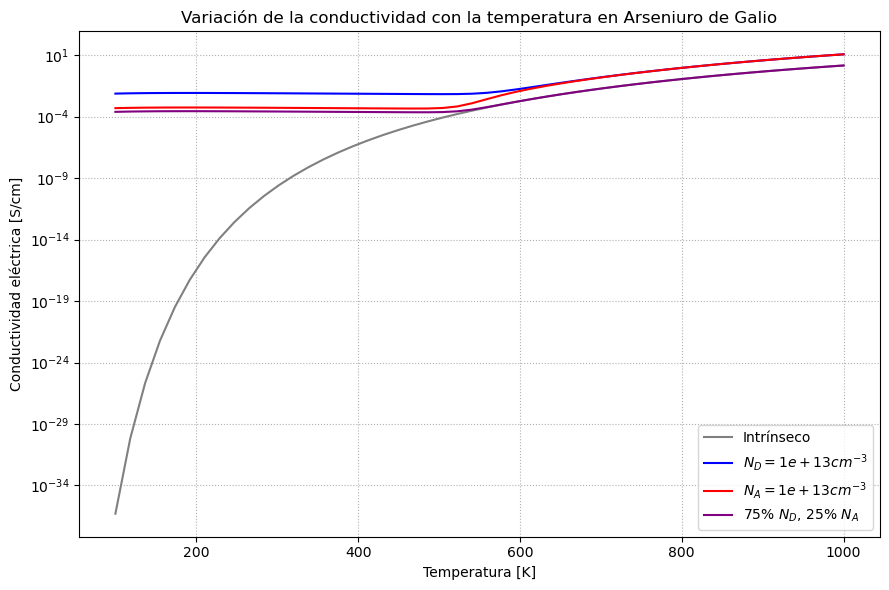

In [10]:
# Gráfica
fig, ax = plt.subplots(figsize=(9, 6))

ax.semilogy(temperaturas.magnitude, conductividades_intrinseco, label="Intrínseco", color="gray")
ax.semilogy(temperaturas.magnitude, conductividades_n, label=fr"$N_D = {dopaje.magnitude:.0e} cm^{{-3}}$", color="blue")
ax.semilogy(temperaturas.magnitude, conductividades_p, label=fr"$N_A = {dopaje.magnitude:.0e} cm^{{-3}}$", color="red")
ax.semilogy(temperaturas.magnitude, conductividades_sn, label=fr"75% $N_D$, 25% $N_A$", color="purple")

ax.set_xlabel("Temperatura [K]")
ax.set_ylabel("Conductividad eléctrica [S/cm]")
ax.set_title("Variación de la conductividad con la temperatura en Arseniuro de Galio")
ax.grid(True, linestyle=":")
ax.legend()
plt.tight_layout()
plt.show()

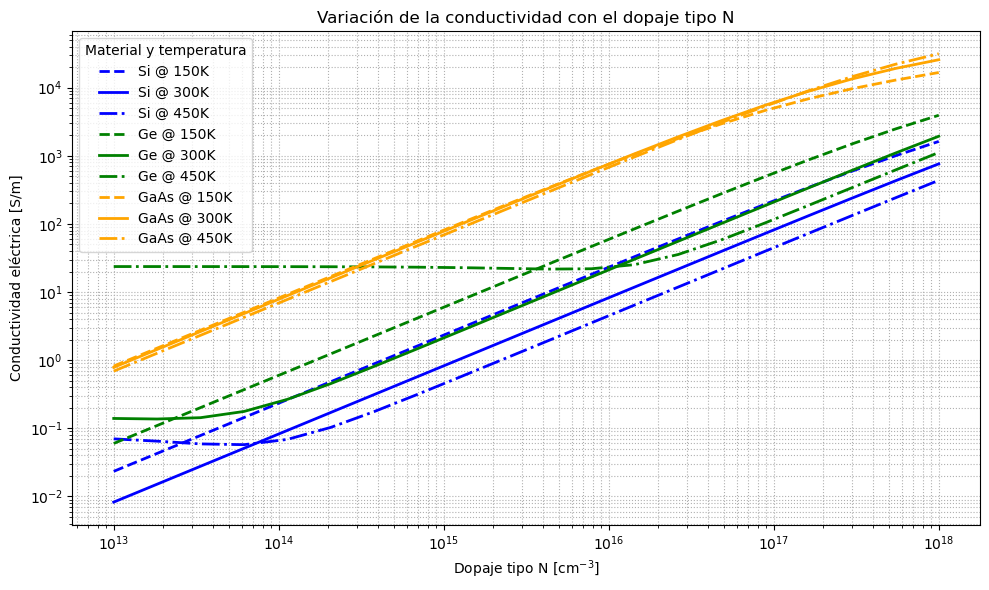

In [11]:
# Valores de dopaje tipo N (en log scale)
dopajes = np.logspace(13, 18, 20) * u.cm**-3

# Temperaturas seleccionadas
temperaturas = [150, 300, 450]  # en K
materiales = ["Si", "Ge", "GaAs"]
colores = ["blue", "green", "orange"]
estilos = ["--", "-", "-."]  # Una para cada T

# Preparar figura
fig, ax = plt.subplots(figsize=(10, 6))

for mat_idx, material in enumerate(materiales):
    for temp_idx, T_K in enumerate(temperaturas):
        T = T_K * u.kelvin
        conductividades = []
        for N_D in dopajes:
            semi = Semiconductor(
                material, T=T, N_D=N_D, N_A=0 * u.meter**-3
            )
            n, p = semi.carrier_concentrations()
            mu_n, mu_p = semi.matthiesen_rule()
            sigma = (n * Q_E * mu_n + p * Q_E * mu_p).to("S/m")
            conductividades.append(sigma.magnitude)

        ax.plot(
            dopajes.magnitude,
            conductividades,
            label=f"{material} @ {T_K}K",
            color=colores[mat_idx],
            linestyle=estilos[temp_idx],
            linewidth=2,
        )

# Ejes y título
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Dopaje tipo N [$\\mathrm{cm^{-3}}$]")
ax.set_ylabel("Conductividad eléctrica [S/m]")
ax.set_title("Variación de la conductividad con el dopaje tipo N")
ax.grid(True, which="both", linestyle=":")
ax.legend(title="Material y temperatura")

# Convertir dopaje a cm⁻³ para eje x (opcional, si prefieres unidades convencionales)
dopajes_cm3 = dopajes.to("1/cm**3").magnitude
ax.set_xticks([1e13, 1e14, 1e15, 1e16, 1e17, 1e18])
ax.set_xticklabels([f"$10^{{{int(np.log10(d))}}}$" for d in [1e13, 1e14, 1e15, 1e16, 1e17, 1e18]])

plt.tight_layout()
plt.show()